In [1]:
import os
import h2o
from h2o.automl import H2OAutoML

In [2]:
os.chdir('..')

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 0 hours 43 mins
H2O cluster timezone:,Asia/Dubai
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.11
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_jpf_nvd96g
H2O cluster total nodes:,1
H2O cluster free memory:,1.607 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [4]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file('ENG_DATA/SELECTED/12-10_all_train.csv')
test = h2o.import_file('ENG_DATA/SELECTED/12-10_all_test.csv')
factor_columns = ['full_address',
 'street_name',
 'type',
 'neighborhood']

#remove column index 
train.columns.remove("C1")
test.columns.remove("C1")

# Identify predictors and response
x = train.columns
y = "sale_price"
x.remove(y)
x.remove("orig_list_price")
x.remove("C1")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
for f in factor_columns: 
    train[f] = train[f].asfactor()
    test[f] = test[f].asfactor()

In [6]:
# Run AutoML for 2 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=2, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20191211_104526,2.47587e+11,497581,2.47587e+11,207300,0.180088
XGBoost_1_AutoML_20191211_104526,2.49612e+11,499612,2.49612e+11,208885,0.183077
StackedEnsemble_BestOfFamily_AutoML_20191211_104526,2.50672e+11,500672,2.50672e+11,209886,0.182556
XGBoost_2_AutoML_20191211_104526,2.52996e+11,502987,2.52996e+11,208967,0.182657


In [7]:
aml.training_info

{'creation_epoch': '1576046726',
 'start_epoch': '1576046726',
 'stop_epoch': '1576047681',
 'duration_secs': '955'}

In [8]:
aml.download_mojo(path='Models/h20-leader-12-11-no_list.mojo')

'/Users/37138/cs/capstone/Models/h20-leader-12-11-no_list.mojo'

In [9]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20191211_104526

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 47623503086.03807
RMSE: 218228.0987545785
MAE: 114250.4252973322
RMSLE: 0.11378144133803635
R^2: 0.9710624618976216
Mean Residual Deviance: 47623503086.03807
Null degrees of freedom: 18975
Residual degrees of freedom: 18973
Null deviance: 3.122945674795961e+16
Residual deviance: 903703594560658.5
AIC: 520414.72953252174

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 247587209609.2255
RMSE: 497581.359788754
MAE: 207299.95816079978
RMSLE: 0.18008757551330665
R^2: 0.8495582255092662
Mean Residual Deviance: 247587209609.2255
Null degrees of freedom: 18975
Residual degrees of freedom: 18973
Null deviance: 3.1234450454679424e+16
Residual deviance: 4698214889544663.0
AIC: 551695.4601829353


In [10]:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'full_address' has levels not trained on: [1 Cuvier St, San Francisco, CA 94112, 1 Del Vale Ave, San Francisco, CA 94127, 1 Edinburgh St, San Francisco, CA 94112, 1 Gabilan Way, San Francisco, CA 94132, 1 Isola Way, San Francisco, CA 94127, 1 McLaren Ave, San Francisco, CA 94121, 1 Miguel St, San Francisco, CA 94131, 1 Northwood Dr, San Francisco, CA 94112, 1 Quartz Way, San Francisco, CA 94131, 1 Raycliff Ter, San Francisco, CA 94115, 1 Silverview Dr, San Francisco, CA 94124, 1 Ventura Ave, San Francisco, CA 94116-1444, 1 West View Ave, San Francisco, CA 94134, 10 Chenery, San Francisco, CA 94131, 10 Crown Terrace, San Francisco, CA 94114-2106, 10 Cumberland St, San Francisco, CA 94110-1525, 10 De Soto, San Francisco, CA 94127, 10 Fernwood Dr, San Francisco, CA 94127-2004, 10 Imperial Ave, San Francisco, CA 94123, 10 Napier Ln, San Francisco, CA 94133, 100 Aloha Ave, San Franc

/Users/37138/anaconda3/lib/python3.6/site-packages/h2o/job.py:70: UserWarning: Test/Validation dataset column 'street_name' has levels not trained on: [25th Avenue North , 41st , 48th , Alpha , Alviso , Ankeny , Arbor , Armstrong , Arroyo , August , Bache , Balhi Ct, Bay , Bitting , Bowman Ct, Broad , Brumiss Ter, Byxbee , Camellia Ave, Camellia St, Ceres , Chicago , Chula , Clarendon , Cleo Rand , Collins , Coso St, Cottage Row , Day , De Soto , Detroit , Diana St, Digby St, Ellert , Eucalyptus , Eugenia , Forest Side , Forest View , Garfield , Garrison , Gates , Gillette Ave, Glenbrook , Gold Mine St, Grand View Ter, Greenwich Ct, Haight , Harriet St, Havelock Ave, Hayes , Howth , Hudson , Inverness , Isola Way, Jefferson , Jerrold , Kalmanovitz St, Kirkham Ave, Kirkwood St, Knott Ct, Lakeview Dr, Latona , Le Conte , Linda , Lippard , Lyndhurst Dr, Macedonia St, Macondray Ln, Madrid Sq, Majestic , Marcela , Marview , Maywood , McLaren Ave, Meacham Pl, Melrose , Mersey St, Mirabel , M

In [11]:
preds['sale_price'] = test['sale_price']

In [12]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
import numpy as np

In [16]:
df_pred = preds.as_data_frame()

In [17]:
models = {}

In [18]:
def getMetrics(name, y_pred_, y_test_):
    metrics = {
        "r2": r2_score(y_pred_, y_test_), 
        "mean_absolute_error": mean_absolute_error(y_pred_, y_test_) / np.mean(y_test_), 
        "median_absolute_error" :median_absolute_error(y_pred_, y_test_) / np.mean(y_test_),
        "mean_abs_perc_error" : np.mean(np.abs((y_pred_ - y_test_) / y_test_)) * 100
    }
    models[f"{name}"] = metrics

In [19]:
getMetrics("12-10-all-automl", df_pred["predict"], df_pred["sale_price"])

In [20]:
models

{'12-10-all-automl': {'r2': 0.8403784505863039,
  'mean_absolute_error': 0.15409576932014515,
  'median_absolute_error': 0.07028173198315717,
  'mean_abs_perc_error': 13.931231504212551}}

In [16]:
df_pred

,predict,sale_price
0,6.712208e+05,665000
1,1.162479e+06,1100000
2,7.236932e+05,700000
3,2.945670e+06,2925000
4,1.476744e+06,1425000
...,...,...
4739,2.510536e+06,2350000
4740,1.641586e+06,1505000
4741,1.905196e+06,1900000
4742,1.332332e+06,1268000


In [21]:
r2_score(df_pred["predict"], df_pred["sale_price"])

0.8403784505863039

In [20]:
df_pred["pct_err"] = ((df_pred["predict"] - df_pred["sale_price"]) / df_pred["sale_price"]) *100

In [21]:
df_pred["pct_err"].describe()

count    4744.000000
mean        1.391958
std        13.047760
min       -65.284841
25%        -5.040566
50%         0.276401
75%         6.171786
max       321.612756
Name: pct_err, dtype: float64

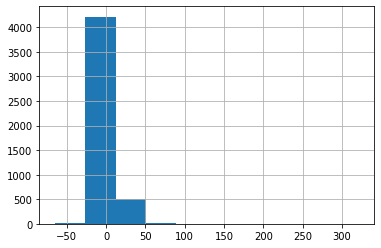

In [22]:
df_pred["pct_err"].hist()

In [ ]:
df_pred.to_csv("ENG_DATA/PREDICTED/12-10_df_h20_leader_predictions_no_list.csv")